In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02)
X = X.reshape(X.shape[0], 1)
print(X.shape)
print(X.ndim)
print("printing X")
print(X)

y = weight * X + bias
print("printing y")
print(y)


In [ ]:
# x = torch.tensor([1, 2, 3, 4])
# print(x)

# print(torch.unsqueeze(x, 0))
# print(torch.unsqueeze(x, -2))
X.shape[0]

In [47]:
train_split = int(0.8 * len(X))
print(train_split)
X_train, y_train = X[ : train_split], y[ : train_split]
X_test, y_test = X[train_split : ], y[train_split : ]

40


In [53]:
def plot_predictions(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None):
    
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_label, c="b", s=4, label="training_data")

    plt.scatter(test_data, test_label, c="g", s=4, label="test_data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    plt.legend(prop={"size": 14});

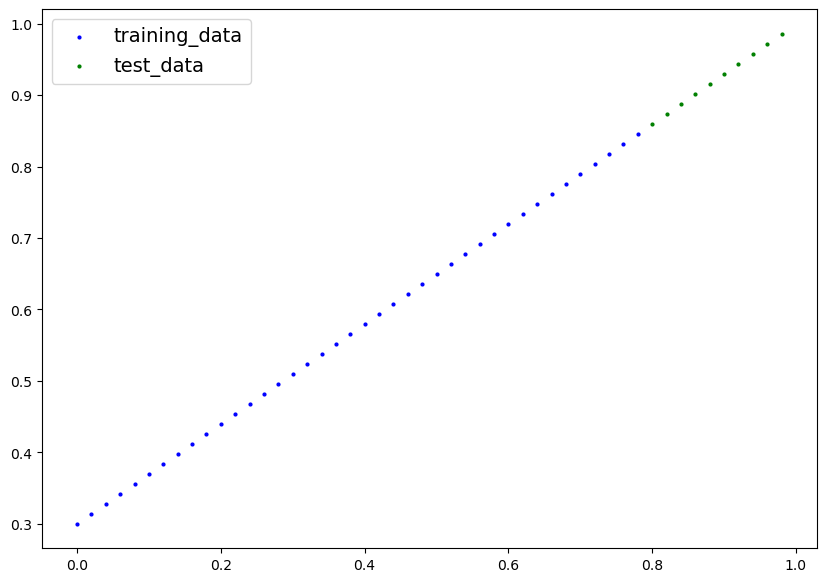

In [54]:
plot_predictions()

In [56]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=true)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=true)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [ ]:
torch.manual_seed